In [2]:
import numpy as np
import os

os.environ['CUDA_VISIBLE_DEVICES'] = '1'
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

In [6]:
actions = ['ll_above', 'uf_outside']

data = np.concatenate([
    # np.load('dataset/합친거/seq_lf_inside_은정30.npy'),
    # np.load('dataset/합친거/seq_lf_outside_은정30.npy'),
    # np.load('dataset/합친거/seq_ll_avobe_은정30.npy'),
    # np.load('dataset/합친거/seq_ll_inside_은정30.npy'),
    # np.load('dataset/합친거/seq_ll_outside_은정30.npy'),
    # np.load('dataset/합친거/seq_lr_above_은정30.npy'),
    # np.load('dataset/합친거/seq_lr_inside_은정30.npy'),
    # np.load('dataset/합친거/seq_lr_outside_은정30.npy'),
    # np.load('dataset/합친거/seq_uf_inside_은정30.npy'),
    # np.load('dataset/합친거/seq_uf_outside_은정30.npy'),
    # np.load('dataset/합친거/seq_ul_above_은정30.npy'),
    # np.load('dataset/합친거/seq_ul_inside_은정30.npy'),
    # np.load('dataset/합친거/seq_ul_outside_은정30.npy'),
    # np.load('dataset/합친거/seq_ur_above_은정30.npy'),
    # np.load('dataset/합친거/seq_ur_inside_은정30.npy')
], axis=0)

data.shape

(421, 30, 106)

In [4]:
x_data = data[:, :, :-1]
labels = data[:, 0, -1]

print(x_data.shape)
print(labels.shape)

(821, 30, 105)
(821,)


In [5]:
from tensorflow.keras.utils import to_categorical

y_data = to_categorical(labels, num_classes=len(actions))
y_data.shape

2023-12-18 23:36:06.449038: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-18 23:36:06.614534: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-18 23:36:06.619797: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-12-18 23:36:06.619817: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if yo

(821, 2)

In [6]:
from sklearn.model_selection import train_test_split

x_data = x_data.astype(np.float32)
y_data = y_data.astype(np.float32)

x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.1, random_state=2021)

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(738, 30, 105) (738, 2)
(83, 30, 105) (83, 2)


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential([
    LSTM(64, activation='relu', input_shape=x_train.shape[1:3]),
    Dense(32, activation='relu'),
    Dense(len(actions), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                43520     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 2)                 66        
                                                                 
Total params: 45,666
Trainable params: 45,666
Non-trainable params: 0
_________________________________________________________________


2023-12-18 23:36:08.372676: E tensorflow/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-12-18 23:36:08.372715: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: piai-Precision-7920-Tower
2023-12-18 23:36:08.372723: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: piai-Precision-7920-Tower
2023-12-18 23:36:08.372860: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 535.54.3
2023-12-18 23:36:08.372882: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 535.54.3
2023-12-18 23:36:08.372888: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:310] kernel version seems to match DSO: 535.54.3
2023-12-18 23:36:08.373364: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use 

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

history = model.fit(
    x_train,
    y_train,
    validation_data=(x_val, y_val),
    epochs=1000,
    callbacks=[
        ModelCheckpoint('models/model.h5', monitor='val_acc', verbose=1, save_best_only=True, mode='auto'),
        ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=50, verbose=1, mode='auto')
    ]
)

Epoch 1/1000
23/24 [===========================>..] - ETA: 0s - loss: 53.9085 - acc: 0.5707
Epoch 1: val_acc improved from -inf to 0.71084, saving model to models/model.h5
24/24 [==============================] - 2s 42ms/step - loss: 53.7624 - acc: 0.5718 - val_loss: 54.1854 - val_acc: 0.7108 - lr: 0.0010
Epoch 2/1000
23/24 [===========================>..] - ETA: 0s - loss: 47.8901 - acc: 0.6793
Epoch 2: val_acc improved from 0.71084 to 0.73494, saving model to models/model.h5
24/24 [==============================] - 1s 30ms/step - loss: 47.7891 - acc: 0.6789 - val_loss: 14.0529 - val_acc: 0.7349 - lr: 0.0010
Epoch 3/1000
23/24 [===========================>..] - ETA: 0s - loss: 9.8243 - acc: 0.8696 
Epoch 3: val_acc improved from 0.73494 to 0.96386, saving model to models/model.h5
24/24 [==============================] - 1s 30ms/step - loss: 10.0282 - acc: 0.8686 - val_loss: 2.2162 - val_acc: 0.9639 - lr: 0.0010
Epoch 4/1000
23/24 [===========================>..] - ETA: 0s - loss: 3.96

NameError: name 'history' is not defined

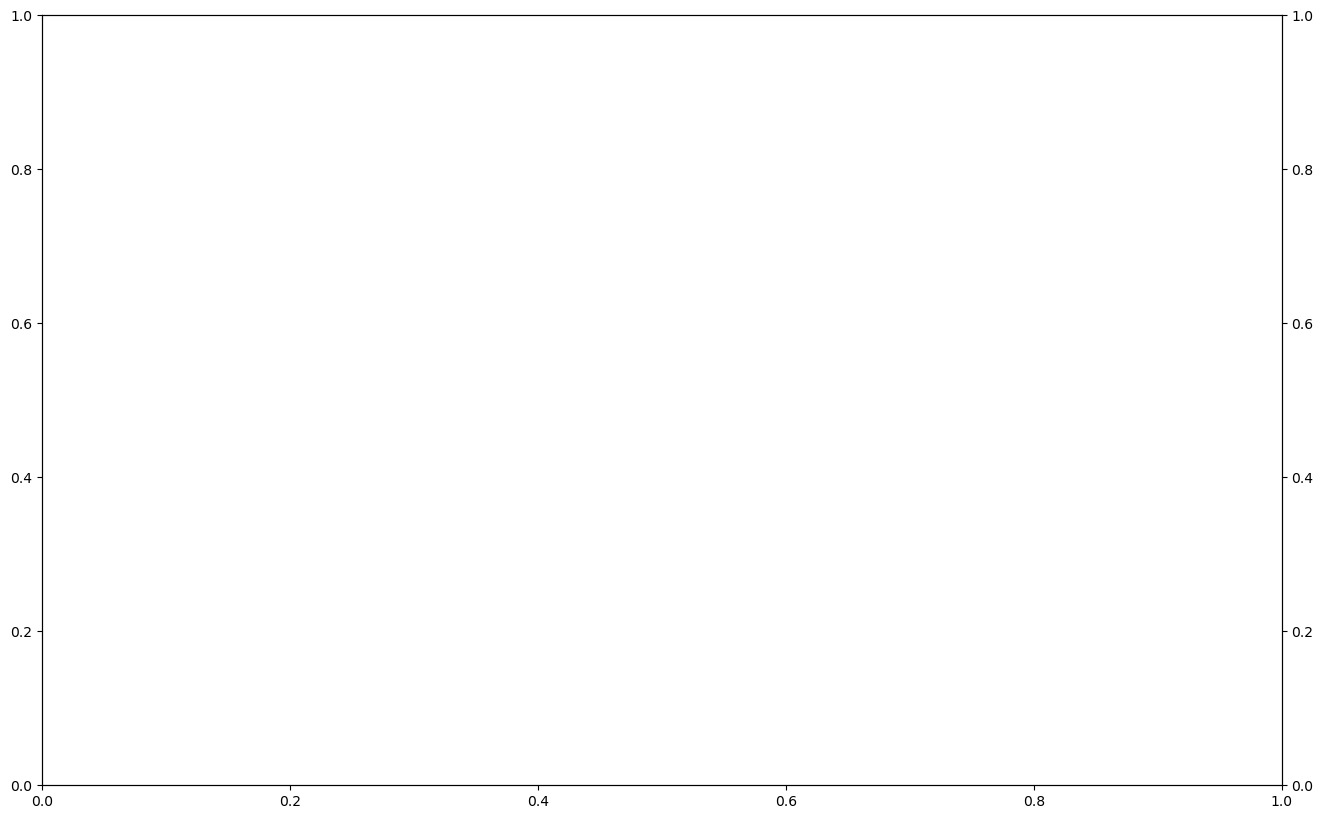

In [9]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots(figsize=(16, 10))
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['acc'], 'b', label='train acc')
acc_ax.plot(history.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

In [9]:
from sklearn.metrics import multilabel_confusion_matrix
from tensorflow.keras.models import load_model

model = load_model('models/model.h5')

y_pred = model.predict(x_val)

multilabel_confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))

3/3 [==============================] - 0s 9ms/step


array([[[42,  2],
        [11, 29]],

       [[29, 11],
        [ 2, 42]]])